<a href="https://colab.research.google.com/github/stepan-ha/Labs/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Алгоритм розрахунку індивідуальних вхідних даних

---

Встановіть значення змінної variant: сума номера групи помноженого на 25 і
порядкового номеру студента в списку групи (групі ПМОм-11 відповідає номер
0, групі ПМІм-11 відповідає номер 1, групі ПМІм-12 відповідає номер 2, групі
ПМІм-13 відповідає номер 3). Далі встановіть set.seed(variant) та згенеруйте
значення змінної redundant як заокруглене до цілого (для заокруглення можна
використати функції floor або round) випадкове число з рівномірного на інтервалі
(номер групи + 5, 25 – номер групи) розподілу (функція runif).


# Завдання 1.1

---

 З допомогою функції read.csv() завантажте дані в R з файлу College.csv.
Модифікуйте завантажені дані College наступним чином: встановивши seed, що
дорівнює значенню змінної variant, видаліть redundant % спостережень з
допомогою функції sample
(College_new=
College[-
sample(1:length(College[,1]),round((redundant/100)*length(College[,1]))),]).

In [58]:
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

group_number = 2

student_number = 5

variant = group_number * 25 + student_number
print(f"Мій номер індивідуального завдання: {variant}")

random.seed(variant)

redundant = math.floor(random.uniform(group_number + 5, 25 - group_number))
print(f"Redundant: {redundant}%")

df = pd.read_csv('College.csv')

print(df.head())

College_new = df.drop(df.sample(frac=redundant / 100, random_state=variant).index)

print(f"Початковий розмір: {df.shape}")
print(f"Новий розмір: {College_new.shape}")


Мій номер індивідуального завдання: 55
Redundant: 8%
                     Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   

# Завдання 1.2

---
Перегляньте дані з допомогою функції fix(). Оскільки перший стовпець це
просто назви університетів, виконайте наступні команди:
rownames=College_new[,1]
College_new=College_new[,-1]
fix(College_new)
Що тепер сталося з першим стовпцем? Для чого змінна rownames?

In [57]:
rownames = College_new.iloc[:, 0]

College_new = College_new.iloc[:, 1:]

print("rownames:")
print(rownames.head())
print("\nCollege_new:")
print(College_new.head())

#rownames зберігає усі значення перщої клонки (Назви університетів)

rownames:
0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: Private, dtype: object

College_new:
   Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc.alumni  Expend  Grad.R

# Завдання 1.3

---


Використовуючи функції summary() та pairs(), отримайте певні підсумки
відносно даних. Використайте pairs() для побудови матриці графіків довільних 3
стовпців даних.
Побудуйте діаграму Outstate vs Private, використовуючи plot() та прокоментуйте
результати.

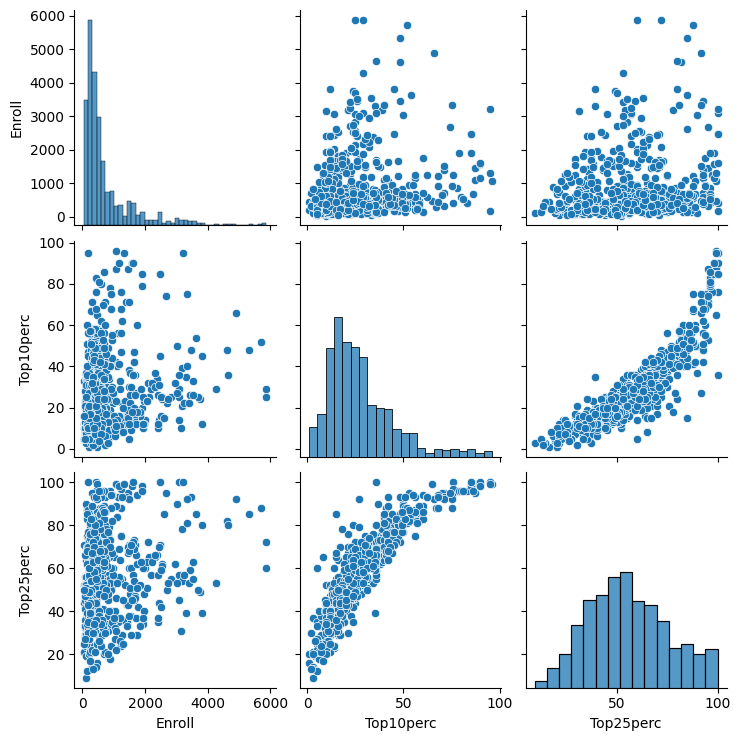

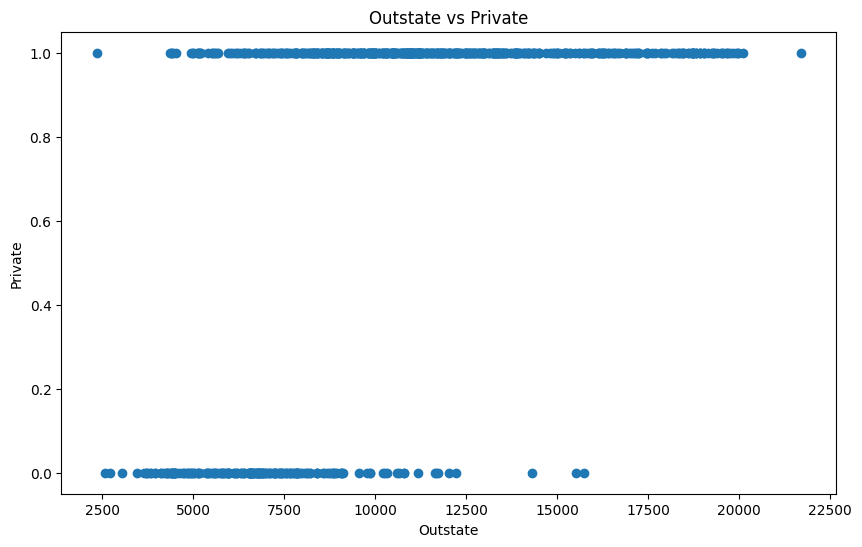

In [56]:

sns.pairplot(College_new.iloc[:, 3:6])
plt.show()

if 'Private' in df.columns:
    College_new['Private_num'] = df['Private'].apply(lambda x: 1 if x == 'Yes' else 0)

    plt.figure(figsize=(10, 6))
    plt.scatter(College_new['Outstate'], College_new['Private_num'])
    plt.xlabel('Outstate')
    plt.ylabel('Private')
    plt.title('Outstate vs Private')
    plt.show()

# Висновок 1.3
---
Побудувавши парні графіки я можу зробити висновки.

*   Параметр Enroll не має жодної очевидної кореляції між іншими двома параметрами (Top25perc та Top10perc)
*   Проте виявив логічний зв'язок між колонками Top25perc(відсоток студентів з топ 25% шкіл) та Top10perc (відсоток студентів з топ 10% шкіл) у переважної більшості університетів параметр Top10perc > Top25perc і є зростаючим відносто Top10perc, бо ті люди що входять до вибірки із топ 10 входять і до топ 25.

Побудувавши графік порівняння Outstate vs Private я можу зробити висновок, що характеристика Private впливає на значення Outstate, бо зі значенням Private = True характеристка Outstate більша у середньому ніж при значенні Private = False.


# Завдання 1.4

---
Створіть новий якісний показник Elite, використовуючи Top10perc, тобто
поділивши всі університети на дві групи в залежності чи перевищує відсоток
студентів з топ 10% шкіл 50% чи ні.
> Elite=rep("No",nrow(College_new))
> Elite[College_new$Top10perc>50]="Yes"
> Elite=as.factor(Elite)
> College_new=data.frame(College_new,Elite)
Для чого дві останні команди? Чи багато таких університетів? Побудуйте
діаграму Outstate vs Elite та прокоментуйте результати.

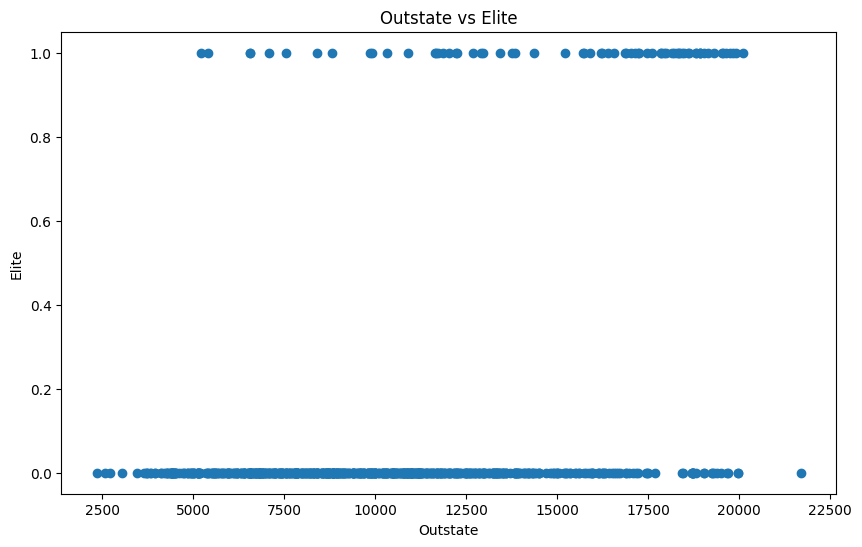

In [55]:
Elite_category = [1 if x > 50 else 0 for x in College_new['Top10perc']]
Elite_category = pd.Categorical(Elite_category)

College_new['Elite'] = Elite_category

plt.figure(figsize=(10, 6))

plt.scatter(College_new['Outstate'], College_new['Elite'])
plt.xlabel('Outstate')
plt.ylabel('Elite')
plt.title('Outstate vs Elite')
plt.show()

# Висновок 1.4

---

Я скомбінував 2 команди для спрощення коду, але загалом вони створюють нову характеристику Elite, яка була заданою формулою в описі завдання. Наступною командою я додаю цю характеристику до сету.

Графік не показав сильної залежності між параметром Elite, але більшість університетів із значенням характеристики Elate = 1 мають переважно більше значення параметру Outstate.

# Завдання 2.1

---

Завантажте дані Boston, які є частиною бібліотеки MASS.
> library (MASS)
Дані знаходяться в об’єкті Boston.
> Boston
Перегляньте інформацію про дані:
> ?Boston
Скільки рядків і стовпців міститься в множині?


In [54]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


boston_df = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
boston_df['TARGET'] = target

print(f"Кількість рядків: {boston_df.shape[0]}")
print(f"Кількість стовпців: {boston_df.shape[1]}")

#цей сет вже був видалений із стандатного набору на Python, але він зберігається в публічному доступі "http://lib.stat.cmu.edu"

Кількість рядків: 506
Кількість стовпців: 14


# Завдання 2.2

---

Модифікуйте завантажені дані Boston наступним чином: встановивши seed, що
дорівнює значенню змінної variant, видаліть redundant % спостережень з
допомогою функції sample().

In [53]:
n = boston_df.shape[0]
n_remove = round((redundant / 100) * n)

indices_to_remove = random.sample(range(n), n_remove)
boston_df_new = boston_df.drop(indices_to_remove)

print(f"Кількість рядків після видалення: {boston_df_new.shape[0]}")

Кількість рядків після видалення: 466


# Завдання 2.3

---

Скільки кварталів в даній множині межують з річкою Charles?
Обчисліть медіану для відношення учні-вчителі для міста загалом?
Які квартали міста мають найменше та найбільше відношення учні-вчителі?
В яких кварталах в середньому є більше 7 кімнат в помешканні? Більше 8?
Більше 4, але менше 7?

In [52]:
print(f"Кількість кварталів, що межують з річкою Charles: {boston_df_new['CHAS'].sum()}")

print(f"Медіана відношення учні-вчителі: {boston_df_new['PTRATIO'].median()}")

print(f"Квартал з найменшим відношенням учні-вчителі: {boston_df_new.loc[boston_df_new['PTRATIO'].idxmin()]}")

print(f"Квартал з найбільшим відношенням учні-вчителі: {boston_df_new.loc[boston_df_new['PTRATIO'].idxmax()]}")

print(f"Кількість кварталів з середньою кількістю кімнат більше 7: {boston_df_new[boston_df_new['RM'] > 7].shape[0]}")

print(f"Кількість кварталів з середньою кількістю кімнат більше 8: {boston_df_new[boston_df_new['RM'] > 8].shape[0]}")

print(f"Кількість кварталів з середньою кількістю кімнат більше 4, але менше 7: {boston_df_new[(boston_df_new['RM'] > 4) & (boston_df_new['RM'] <= 7)].shape[0]}")


Кількість кварталів, що межують з річкою Charles: 29.0
Медіана відношення учні-вчителі: 19.0
Квартал з найменшим відношенням учні-вчителі: CRIM         0.04011
ZN          80.00000
INDUS        1.52000
CHAS         0.00000
NOX          0.40400
RM           7.28700
AGE         34.10000
DIS          7.30900
RAD          2.00000
TAX        329.00000
PTRATIO     12.60000
B          396.90000
LSTAT        4.08000
TARGET      33.30000
Name: 196, dtype: float64
Квартал з найбільшим відношенням учні-вчителі: CRIM         0.04301
ZN          80.00000
INDUS        1.91000
CHAS         0.00000
NOX          0.41300
RM           5.66300
AGE         21.90000
DIS         10.58570
RAD          4.00000
TAX        334.00000
PTRATIO     22.00000
B          382.80000
LSTAT        8.05000
TARGET      18.20000
Name: 354, dtype: float64
Кількість кварталів з середньою кількістю кімнат більше 7: 54
Кількість кварталів з середньою кількістю кімнат більше 8: 11
Кількість кварталів з середньою кількістю кімнат б